# **Proyek Akhir: Klasifikasi Gambar**

- Dataset: Rock-Paper-Scissors image
- Pembagian dataset:
    - 60% training (1314 gambar)
    - 40% validasi (874 gambar)
- Akurasi final: 100%
- Waktu training: 4 menit (GPU T4 - Colab)
- Ketentuan reproducing:
    - Menggunakan random_state=2023 untuk splitting dataset


### Data diri
- Nama: Yudha Putra Arisandy
- Pekerjaan: Mahasiswa - Fresh Graduate
- Domisili: Dramaga, Bogor
- Email: yudhapa17@gmail.com

In [1]:
# Mengunduh dan meng-unzip dataset

!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!unzip rockpaperscissors.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM2vL2cWX6Cay.png  
  inf

In [2]:
# Mempersiapkan directory dataset

import os
from sklearn.model_selection import train_test_split

# Membagi train dan val untuk masing-masing kelas
base_dir = 'rockpaperscissors'

def train_val_split(class_: str, val_size: float):
  basic_dir = os.path.join(base_dir, class_)
  files = os.listdir(basic_dir) # Mengambil semua gambar di dalam folder
  files_dir = os.path.join(base_dir, class_)
  dir = list()
  for file in files:
    dir.append(os.path.join(files_dir, file))
  train_list, val_list = train_test_split(dir, test_size=val_size, random_state=2023)
  return train_list, val_list

# Membagi Train-validation set (60% train dan 40% validation)
rock_files_train, rock_files_val = train_val_split(class_='rock', val_size=0.3987)
paper_files_train, paper_files_val = train_val_split(class_='paper', val_size=0.3987)
scissors_files_train, scissors_files_val = train_val_split(class_='scissors', val_size=0.3987)

train_dir = rock_files_train + paper_files_train + scissors_files_train
validation_dir = rock_files_val + paper_files_val + scissors_files_val

print(f'Jumlah data train: {len(train_dir)}')
print(f'Jumlah data validation: {len(validation_dir)}')

Jumlah data train: 1314
Jumlah data validation: 874


In [3]:
# Membuat dataframe untuk memudahkan proses augmentasi

import pandas as pd

labels_train = [train_dir[i].split('/')[1] for i in range(len(train_dir))]
labels_val = [validation_dir[i].split('/')[1] for i in range(len(validation_dir))]

df_train = pd.DataFrame({'filename': train_dir, 'label': labels_train})
df_val = pd.DataFrame({'filename': validation_dir, 'label': labels_val})

print('Dataframe is ready!')

Dataframe is ready!


In [4]:
# Mendeklarasikan image data generator dan melakukan augmentasi gambar

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        df_train,  # Direktori data latih
        x_col='filename', # Kolom yang mengandung nama file
        y_col='label',     # Kolom yang mengandung label
        target_size=(150, 150),  # Mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=16,
        # Karena ini merupakan masalah klasifikasi 3 kelas, gunakan class_mode = 'categorical'
        class_mode='categorical')

validation_generator = test_datagen.flow_from_dataframe(
        df_val, # Direktori data validasi
        x_col='filename', # Kolom yang mengandung nama file
        y_col='label',     # Kolom yang mengandung label
        target_size=(150, 150), # Mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=16,
        # Karena ini merupakan masalah klasifikasi 3 kelas, gunakan class_mode = 'categorical'
        class_mode='categorical')

print('\nDataset is ready!')

Found 1314 validated image filenames belonging to 3 classes.
Found 874 validated image filenames belonging to 3 classes.

Dataset is ready!


In [5]:
# Deklarasi model sequential

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense

model = tf.keras.models.Sequential([
    Conv2D(64, (5,5), activation='relu', input_shape=(150, 150, 3)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(512, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

# Menampilkan summary model
model.summary()

model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 64)      4864      
                                                                 
 conv2d_1 (Conv2D)           (None, 144, 144, 128)     73856     
                                                                 
 max_pooling2d (MaxPooling2  (None, 72, 72, 128)       0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 70, 70, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 35, 35, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 33, 33, 512)       5

In [6]:
# Training model

from tensorflow.keras.callbacks import TensorBoard
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

# Opsi ketika menggunakan local computer - pantau training melalui tensorboard
# log_dir = "logs/fit/"  # Specify the directory for TensorBoard logs
# tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Menggunakan learning rate reduction
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.000003)

# Menggunakan early stopping
early_stopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              verbose=1,
                              start_from_epoch=13)

# Menyimpan checkpoint model terbaik
best_model_path= "ckpt/best_model.h5"
checkpoint = ModelCheckpoint(best_model_path,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max',
                             save_weights_only=False)

# Memulai training
history = model.fit(
                  train_generator,
                  steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
                  epochs=50,
                  validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
                  validation_steps=5,
                  verbose=2,
                  callbacks=[learning_rate_reduction,
                             early_stopping,
                             checkpoint])

# Menyimpan history training
with open('ckpt/training_history.txt', 'w') as file:
    file.write(str(history.history))

Epoch 1/50

Epoch 1: val_accuracy improved from -inf to 0.37500, saving model to ckpt/best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 - 19s - loss: 1.8101 - accuracy: 0.3825 - val_loss: 1.0946 - val_accuracy: 0.3750 - lr: 0.0010 - 19s/epoch - 768ms/step
Epoch 2/50

Epoch 2: val_accuracy improved from 0.37500 to 0.38750, saving model to ckpt/best_model.h5
25/25 - 14s - loss: 1.0983 - accuracy: 0.3342 - val_loss: 1.0951 - val_accuracy: 0.3875 - lr: 0.0010 - 14s/epoch - 574ms/step
Epoch 3/50

Epoch 3: val_accuracy improved from 0.38750 to 0.62500, saving model to ckpt/best_model.h5
25/25 - 7s - loss: 1.0653 - accuracy: 0.4326 - val_loss: 0.9279 - val_accuracy: 0.6250 - lr: 0.0010 - 7s/epoch - 297ms/step
Epoch 4/50

Epoch 4: val_accuracy did not improve from 0.62500
25/25 - 4s - loss: 0.8962 - accuracy: 0.6010 - val_loss: 0.8212 - val_accuracy: 0.6125 - lr: 0.0010 - 4s/epoch - 151ms/step
Epoch 5/50

Epoch 5: val_accuracy improved from 0.62500 to 0.80000, saving model to ckpt/best_model.h5
25/25 - 8s - loss: 0.6742 - accuracy: 0.7400 - val_loss: 0.6985 - val_accuracy: 0.8000 - lr: 0.0010 - 8s/epoch - 308ms/step
Epoc

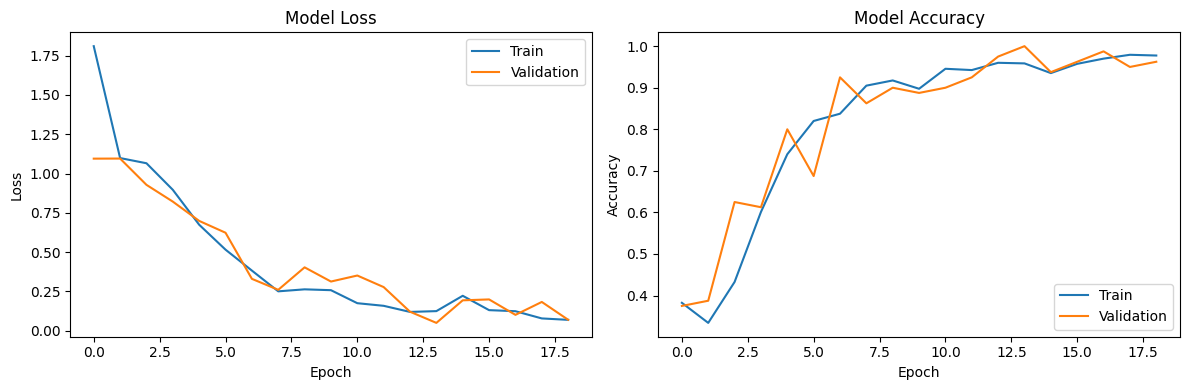

In [7]:
# Plot grafik loss dan accuracy

import matplotlib.pyplot as plt
%matplotlib inline

# Plot training and validation loss
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()

Saving 0CSaM2vL2cWX6Cay.png to 0CSaM2vL2cWX6Cay.png
Saving 01dM3ewPIsnBICu1.png to 01dM3ewPIsnBICu1.png
Saving 2fxAdPTgrVIoITsL.png to 2fxAdPTgrVIoITsL.png
Saving 2J7q0JbqJrjmZC05.png to 2J7q0JbqJrjmZC05.png
Saving 2JRYQXb5kmlhgD5i.png to 2JRYQXb5kmlhgD5i.png
Saving 04l5I8TqdzF9WDMJ.png to 04l5I8TqdzF9WDMJ.png
Saving 6OhEpnz0QxBCfbXE.png to 6OhEpnz0QxBCfbXE.png
Saving 27XFtQjjXQ8AP8Tl.png to 27XFtQjjXQ8AP8Tl.png
Saving 724DhutGELMHY1uD.png to 724DhutGELMHY1uD.png
Saving 4484TuJc6AH7pDOG.png to 4484TuJc6AH7pDOG.png
Saving CjjM6i1OEFaKcm6e.png to CjjM6i1OEFaKcm6e.png
Saving JNPDbgVUhQbrurMZ.png to JNPDbgVUhQbrurMZ.png
Saving lO2wvyJGrQBZvX9P.png to lO2wvyJGrQBZvX9P.png
Saving NLwrHPTaiNSMjHLX.png to NLwrHPTaiNSMjHLX.png
Saving W502bu3C93KtmDol.png to W502bu3C93KtmDol.png


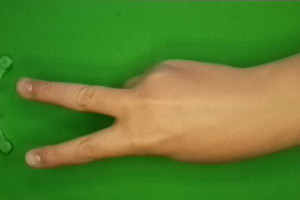

1/1 [==============================] - 1s 580ms/step
0CSaM2vL2cWX6Cay.png
Class: Scissors
---------------



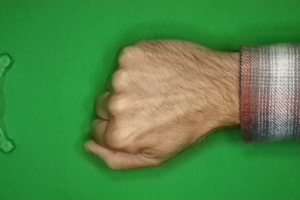

1/1 [==============================] - 0s 17ms/step
01dM3ewPIsnBICu1.png
Class: Rock
---------------



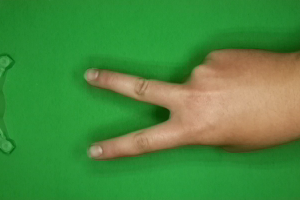

1/1 [==============================] - 0s 17ms/step
2fxAdPTgrVIoITsL.png
Class: Scissors
---------------



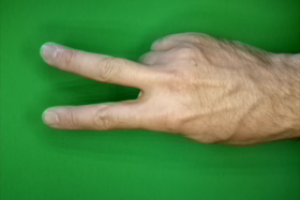

1/1 [==============================] - 0s 16ms/step
2J7q0JbqJrjmZC05.png
Class: Scissors
---------------



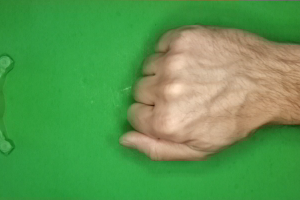

1/1 [==============================] - 0s 17ms/step
2JRYQXb5kmlhgD5i.png
Class: Rock
---------------



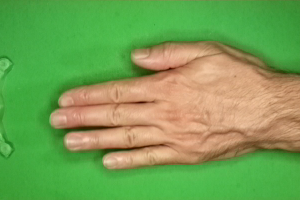

1/1 [==============================] - 0s 19ms/step
04l5I8TqdzF9WDMJ.png
Class: Paper
---------------



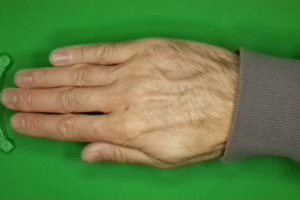

1/1 [==============================] - 0s 17ms/step
6OhEpnz0QxBCfbXE.png
Class: Paper
---------------



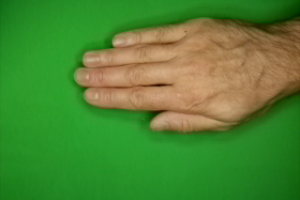

1/1 [==============================] - 0s 16ms/step
27XFtQjjXQ8AP8Tl.png
Class: Paper
---------------



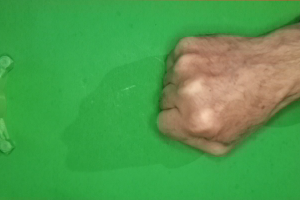

1/1 [==============================] - 0s 16ms/step
724DhutGELMHY1uD.png
Class: Rock
---------------



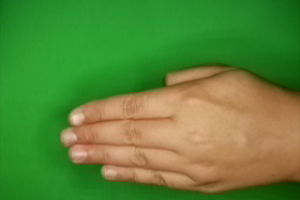

1/1 [==============================] - 0s 19ms/step
4484TuJc6AH7pDOG.png
Class: Paper
---------------



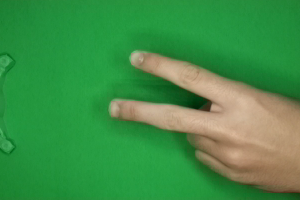

1/1 [==============================] - 0s 23ms/step
CjjM6i1OEFaKcm6e.png
Class: Scissors
---------------



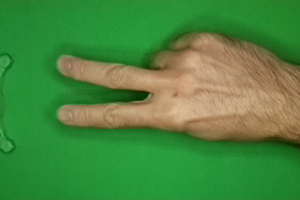

1/1 [==============================] - 0s 30ms/step
JNPDbgVUhQbrurMZ.png
Class: Scissors
---------------



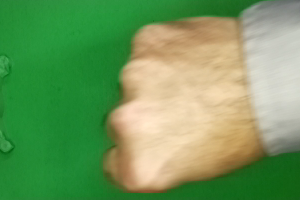

1/1 [==============================] - 0s 28ms/step
lO2wvyJGrQBZvX9P.png
Class: Rock
---------------



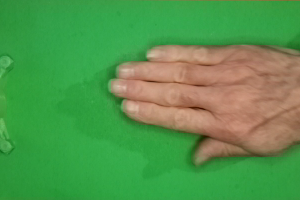

1/1 [==============================] - 0s 28ms/step
NLwrHPTaiNSMjHLX.png
Class: Paper
---------------



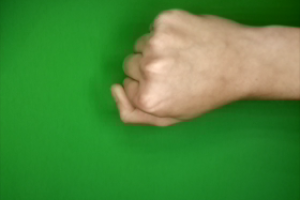

1/1 [==============================] - 0s 23ms/step
W502bu3C93KtmDol.png
Class: Rock
---------------



In [8]:
# Inference

import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, Image
%matplotlib inline

# Jika melakukan inference tanpa melakukan training pada runtime yang sama
# (hanya load model terbaik)
checkpoint_filepath = 'ckpt/best_model.h5'
model= load_model(checkpoint_filepath)

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  display(Image(filename=path, width=150, height=150))  # Display the image

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes[0][0] == 1:
    print('Class: Paper\n---------------\n')
  elif classes[0][1] == 1:
    print('Class: Rock\n---------------\n')
  else:
    print('Class: Scissors\n---------------\n')